In [1]:
import os
import matplotlib.pyplot as plt

In [2]:
import tensorflow as tf

In [3]:
print("TensorFlow version: {}".format(tf.__version__))
print("Eager execution: {}".format(tf.executing_eagerly()))

TensorFlow version: 2.5.0
Eager execution: True


In [4]:
train_dataset_url = "https://storage.googleapis.com/download.tensorflow.org/data/iris_training.csv"

train_dataset_fp = tf.keras.utils.get_file(fname=os.path.basename(train_dataset_url),
                                           origin=train_dataset_url)

print("Local copy of the dataset file: {}".format(train_dataset_fp))

Local copy of the dataset file: C:\Users\pjatthi\.keras\datasets\iris_training.csv


In [33]:
import pandas as pd #loading data in table form  
import seaborn as sns #visualisation 

In [5]:
# column order in CSV file
column_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']

feature_names = column_names[:-1]
label_name = column_names[-1]

print("Features: {}".format(feature_names))
print("Label: {}".format(label_name))

Features: ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
Label: species


In [6]:
class_names = ['Iris setosa', 'Iris versicolor', 'Iris virginica']

In [7]:
batch_size = 32

train_dataset = tf.data.experimental.make_csv_dataset(
    train_dataset_fp,
    batch_size,
    column_names=column_names,
    label_name=label_name,
    num_epochs=1)

In [8]:
features, labels = next(iter(train_dataset))

print(features)

OrderedDict([('sepal_length', <tf.Tensor: shape=(32,), dtype=float32, numpy=
array([5.8, 6.1, 6.4, 6.9, 5.3, 4.8, 6.4, 6.7, 5.5, 5. , 7.2, 5.1, 4.6,
       5. , 7.7, 5.6, 6.3, 4.8, 5.6, 5.4, 6.3, 6.3, 4.6, 6.6, 5.8, 5. ,
       6. , 5.4, 6.4, 5.7, 7.7, 4.9], dtype=float32)>), ('sepal_width', <tf.Tensor: shape=(32,), dtype=float32, numpy=
array([4. , 2.8, 3.2, 3.1, 3.7, 3. , 2.8, 3.1, 2.4, 3.5, 3.6, 3.8, 3.2,
       2.3, 2.8, 2.7, 3.3, 3.4, 2.9, 3. , 2.7, 2.3, 3.4, 3. , 2.7, 3.4,
       2.2, 3.4, 2.8, 3. , 3.8, 2.4], dtype=float32)>), ('petal_length', <tf.Tensor: shape=(32,), dtype=float32, numpy=
array([1.2, 4.7, 4.5, 5.1, 1.5, 1.4, 5.6, 5.6, 3.7, 1.6, 6.1, 1.5, 1.4,
       3.3, 6.7, 4.2, 4.7, 1.6, 3.6, 4.5, 4.9, 4.4, 1.4, 4.4, 5.1, 1.6,
       5. , 1.5, 5.6, 4.2, 6.7, 3.3], dtype=float32)>), ('petal_width', <tf.Tensor: shape=(32,), dtype=float32, numpy=
array([0.2, 1.2, 1.5, 2.3, 0.2, 0.1, 2.2, 2.4, 1. , 0.6, 2.5, 0.3, 0.2,
       1. , 2. , 1.3, 1.6, 0.2, 1.3, 1.5, 1.8, 1.3, 0.3, 1.4,

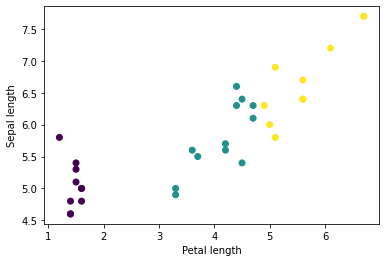

In [9]:
plt.scatter(features['petal_length'],
            features['sepal_length'],
            c=labels,
            cmap='viridis')

plt.xlabel("Petal length")
plt.ylabel("Sepal length")
plt.show()

In [10]:
def pack_features_vector(features, labels):
  """Pack the features into a single array."""
  features = tf.stack(list(features.values()), axis=1)
  return features, labels

In [11]:
train_dataset = train_dataset.map(pack_features_vector)

In [12]:
features, labels = next(iter(train_dataset))

print(features[:5])

tf.Tensor(
[[6.5 3.  5.8 2.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.4 1.4 0.3]
 [7.3 2.9 6.3 1.8]
 [4.9 3.  1.4 0.2]], shape=(5, 4), dtype=float32)


In [13]:
model = tf.keras.Sequential([
  tf.keras.layers.Dense(8, activation=tf.nn.relu, input_shape=(4,)),  # input shape required, 8 Neurons first hidden layer
  tf.keras.layers.Dense(4, activation=tf.nn.relu), #hidden layer 2 with 4 neurons
  tf.keras.layers.Dense(4, activation=tf.nn.relu), #hidden layer 3 with 4 neurons
  tf.keras.layers.Dense(3) #output layer
])

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 8)                 40        
_________________________________________________________________
dense_1 (Dense)              (None, 4)                 36        
_________________________________________________________________
dense_2 (Dense)              (None, 4)                 20        
_________________________________________________________________
dense_3 (Dense)              (None, 3)                 15        
Total params: 111
Trainable params: 111
Non-trainable params: 0
_________________________________________________________________


In [15]:
predictions = model(features)
predictions[:5]

<tf.Tensor: shape=(5, 3), dtype=float32, numpy=
array([[-0.30211723,  1.0877486 ,  0.7669155 ],
       [ 0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ],
       [-0.33059183,  1.270354  ,  0.8896016 ],
       [ 0.        ,  0.        ,  0.        ]], dtype=float32)>

In [16]:
tf.nn.softmax(predictions[:5])

<tf.Tensor: shape=(5, 3), dtype=float32, numpy=
array([[0.12615317, 0.5064181 , 0.36742875],
       [0.33333334, 0.33333334, 0.33333334],
       [0.33333334, 0.33333334, 0.33333334],
       [0.10700266, 0.53048915, 0.36250818],
       [0.33333334, 0.33333334, 0.33333334]], dtype=float32)>

In [17]:
print("Prediction: {}".format(tf.argmax(predictions, axis=1)))
print("    Labels: {}".format(labels))

Prediction: [1 0 0 1 0 1 1 1 0 1 0 1 0 1 1 0 1 1 1 0 1 1 0 0 0 0 1 0 1 1 0 1]
    Labels: [2 0 0 2 0 1 2 1 0 2 0 1 0 1 1 0 2 2 2 0 2 2 0 0 0 0 2 0 1 1 0 1]


In [18]:
loss_object = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

In [19]:
def loss(model, x, y, training):
  # training=training is needed only if there are layers with different
  # behavior during training versus inference (e.g. Dropout).
  y_ = model(x, training=training)

  return loss_object(y_true=y, y_pred=y_)


l = loss(model, features, labels, training=False)
print("Loss test: {}".format(l))

Loss test: 0.9955552816390991


In [20]:
def grad(model, inputs, targets):
  with tf.GradientTape() as tape:
    loss_value = loss(model, inputs, targets, training=True)
  return loss_value, tape.gradient(loss_value, model.trainable_variables)

In [21]:
optimizer = tf.keras.optimizers.SGD(learning_rate=0.01)

In [22]:
loss_value, grads = grad(model, features, labels)

print("Step: {}, Initial Loss: {}".format(optimizer.iterations.numpy(),
                                          loss_value.numpy()))

optimizer.apply_gradients(zip(grads, model.trainable_variables))

print("Step: {},         Loss: {}".format(optimizer.iterations.numpy(),
                                          loss(model, features, labels, training=True).numpy()))

Step: 0, Initial Loss: 0.9955552816390991
Step: 1,         Loss: 0.9857443571090698


In [23]:
## Note: Rerunning this cell uses the same model variables

# Keep results for plotting
train_loss_results = []
train_accuracy_results = []

num_epochs = 201

for epoch in range(num_epochs):
  epoch_loss_avg = tf.keras.metrics.Mean()
  epoch_accuracy = tf.keras.metrics.SparseCategoricalAccuracy()

  # Training loop - using batches of 32
  for x, y in train_dataset:
    # Optimize the model
    loss_value, grads = grad(model, x, y)
    optimizer.apply_gradients(zip(grads, model.trainable_variables))

    # Track progress
    epoch_loss_avg.update_state(loss_value)  # Add current batch loss
    # Compare predicted label to actual label
    # training=True is needed only if there are layers with different
    # behavior during training versus inference (e.g. Dropout).
    epoch_accuracy.update_state(y, model(x, training=True))

  # End epoch
  train_loss_results.append(epoch_loss_avg.result())
  train_accuracy_results.append(epoch_accuracy.result())

  
  if epoch % 50 == 0:
    print("Epoch {:03d}: Loss: {:.3f}, Accuracy: {:.3%} ".format(epoch,
                                                                epoch_loss_avg.result(),
                                                                epoch_accuracy.result()))

Epoch 000: Loss: 0.949, Accuracy: 65.000% 
Epoch 050: Loss: 0.695, Accuracy: 70.000% 
Epoch 100: Loss: 0.543, Accuracy: 85.833% 
Epoch 150: Loss: 0.386, Accuracy: 96.667% 
Epoch 200: Loss: 0.293, Accuracy: 98.333% 


In [24]:
print(len(model.layers))
for layer in model.layers:
    weights = layer.get_weights() # list of numpy arrays
    print(layer.get_weights())

4
[array([[-0.14857727,  0.3028845 , -0.6023172 , -0.5510047 ,  0.6557011 ,
        -0.51961666, -0.34695014, -0.681362  ],
       [-0.10499132, -0.01823614,  0.35733145, -0.3425153 ,  0.57766545,
        -0.68106693, -0.5130087 , -0.30220336],
       [-0.06270069,  1.015603  , -0.12549037,  0.77211195, -0.3086364 ,
         0.16953856, -0.43903056, -0.16742331],
       [-0.4569032 , -0.00549288,  0.42696732,  0.86153644, -0.18310654,
        -0.09451854, -0.03672206, -0.46678662]], dtype=float32), array([ 0.        , -0.04089386,  0.        , -0.03556578,  0.07986836,
        0.        ,  0.        ,  0.        ], dtype=float32)]
[array([[ 0.5142991 , -0.5347621 ,  0.138022  ,  0.34880918],
       [ 0.22346385,  0.76646465,  0.82288414, -0.32938105],
       [ 0.26498365, -0.3435924 , -0.41926977,  0.06447774],
       [ 0.30175677, -0.7497216 ,  0.5405155 , -0.4383145 ],
       [-0.5733351 , -0.3119815 , -0.5025901 ,  0.891122  ],
       [ 0.4544105 ,  0.01414007, -0.0707261 ,  0.26664

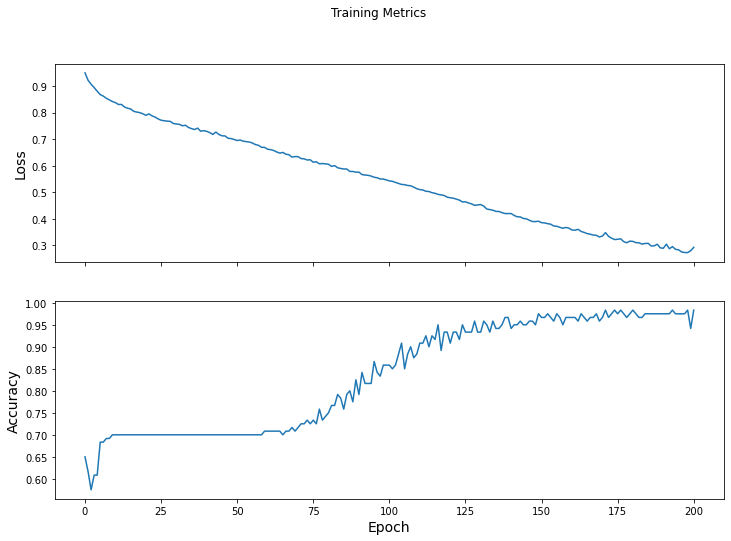

In [25]:
fig, axes = plt.subplots(2, sharex=True, figsize=(12, 8))
fig.suptitle('Training Metrics')

axes[0].set_ylabel("Loss", fontsize=14)
axes[0].plot(train_loss_results)

axes[1].set_ylabel("Accuracy", fontsize=14)
axes[1].set_xlabel("Epoch", fontsize=14)
axes[1].plot(train_accuracy_results)
plt.show()

In [26]:
test_url = "https://storage.googleapis.com/download.tensorflow.org/data/iris_test.csv"

test_fp = tf.keras.utils.get_file(fname=os.path.basename(test_url),
                                  origin=test_url)

In [27]:
test_dataset = tf.data.experimental.make_csv_dataset(
    test_fp,
    batch_size,
    column_names=column_names,
    label_name='species',
    num_epochs=1,
    shuffle=False)

test_dataset = test_dataset.map(pack_features_vector)

In [28]:
test_accuracy = tf.keras.metrics.Accuracy()

for (x, y) in test_dataset:
  # training=False is needed only if there are layers with different
  # behavior during training versus inference (e.g. Dropout).
  logits = model(x, training=False)
  prediction = tf.argmax(logits, axis=1, output_type=tf.int32)
  test_accuracy(prediction, y)

print("Test set accuracy: {:.3%}".format(test_accuracy.result()))

Test set accuracy: 96.667%


In [29]:
tf.stack([y,prediction],axis=1)

<tf.Tensor: shape=(30, 2), dtype=int32, numpy=
array([[1, 1],
       [2, 2],
       [0, 0],
       [1, 1],
       [1, 1],
       [1, 1],
       [0, 0],
       [2, 2],
       [1, 1],
       [2, 2],
       [2, 2],
       [0, 0],
       [2, 2],
       [1, 1],
       [1, 1],
       [0, 0],
       [1, 1],
       [0, 0],
       [0, 0],
       [2, 2],
       [0, 0],
       [1, 1],
       [2, 2],
       [1, 2],
       [1, 1],
       [1, 1],
       [0, 0],
       [1, 1],
       [2, 2],
       [1, 1]])>

In [30]:
predict_dataset = tf.convert_to_tensor([
    [5.1, 3.3, 1.7, 0.5,],
    [5.9, 3.0, 4.2, 1.5,],
    [6.9, 3.1, 5.4, 2.1]
])

# training=False is needed only if there are layers with different
# behavior during training versus inference (e.g. Dropout).
predictions = model(predict_dataset, training=False)

for i, logits in enumerate(predictions):
  class_idx = tf.argmax(logits).numpy()
  p = tf.nn.softmax(logits)[class_idx]
  name = class_names[class_idx]
  print("Example {} prediction: {} ({:4.1f}%)".format(i, name, 100*p))

Example 0 prediction: Iris setosa (73.1%)
Example 1 prediction: Iris versicolor (85.7%)
Example 2 prediction: Iris virginica (68.8%)
